In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.tsa.stattools as ts 

/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. Google SV and Bitcoin WAV in USD

In [2]:
bitcoin_weekly_volume = pd.DataFrame.from_csv("Bitcoin Weekly Volume Data USD.csv")
google_queries = pd.DataFrame.from_csv("Google Trends Relative Search Volume.csv")

## 1.1 Correlation of non-transformed data (Non-stationary)

In [3]:
google_queries_and_volume = pd.concat([bitcoin_weekly_volume, google_queries], axis=1)
google_queries_and_volume = google_queries_and_volume.drop(["Week"],axis=1)
google_queries_and_volume.head()

,Date,Average Volume per Week,Relative Search Volume
0,2013-04-14,1.815588e+06,6
1,2013-04-21,1.770383e+06,3
2,2013-04-28,1.770067e+06,3
3,2013-05-05,1.154001e+06,2
4,2013-05-12,8.223102e+05,3


### Check linearity and homoscedasticity

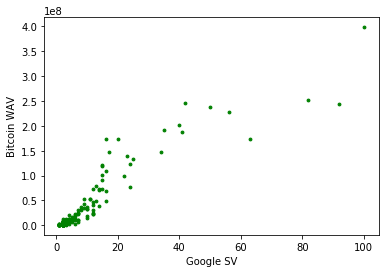

In [4]:
plt.scatter(google_queries_and_volume["Relative Search Volume"],google_queries_and_volume["Average Volume per Week"],c="g", s=8)
plt.xlabel("Google SV")
plt.ylabel("Bitcoin WAV")
plt.show()

### Perform correlation analyis

In [5]:
stats.pearsonr(google_queries_and_volume["Relative Search Volume"], google_queries_and_volume["Average Volume per Week"])

(0.93247465726265499, 1.5583781522274616e-116)

### Cross-Correlation

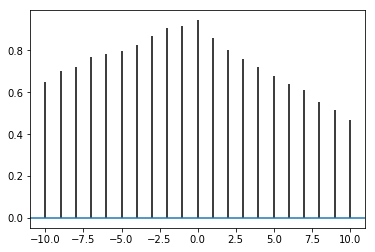

In [6]:
plt.xcorr(google_queries_and_volume["Relative Search Volume"], google_queries_and_volume["Average Volume per Week"] )
plt.show()

## 1.2 Correlation of first log differences (stationary)

### Calculate First log differences

In [7]:
bitcoin_weekly_volume_log = bitcoin_weekly_volume["Average Volume per Week"].apply(np.log)

In [8]:
bitcoin_weekly_volume_log_diff = bitcoin_weekly_volume_log.diff()
bitcoin_weekly_volume_log_diff = bitcoin_weekly_volume_log_diff.drop(0)
bitcoin_weekly_volume_log_diff.head()

1   -0.025213
2   -0.000179
3   -0.427782
4   -0.338873
5    0.033076
Name: Average Volume per Week, dtype: float64

In [9]:
google_queries_log = google_queries["Relative Search Volume"].apply(np.log)
google_queries_log_diff = google_queries_log.diff()
google_queries_log_diff = google_queries_log_diff.drop(0)
google_queries_log_diff.head()

1   -0.693147
2    0.000000
3   -0.405465
4    0.405465
5   -0.405465
Name: Relative Search Volume, dtype: float64

### Check linearity and homoscedasticity

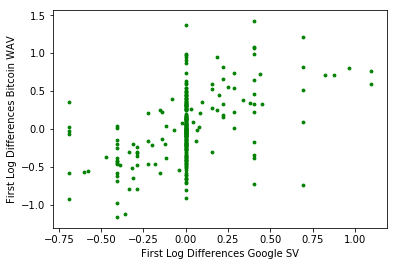

In [10]:
plt.scatter(google_queries_log_diff, bitcoin_weekly_volume_log_diff,c="g", s=8)
plt.xlabel("First Log Differences Google SV")
plt.ylabel("First Log Differences Bitcoin WAV")
plt.show()

### Perform correlation analysis

In [11]:
stats.pearsonr(google_queries_log_diff, bitcoin_weekly_volume_log_diff)

(0.5005540636288045, 6.8057192283097758e-18)

### Cross-Correlation

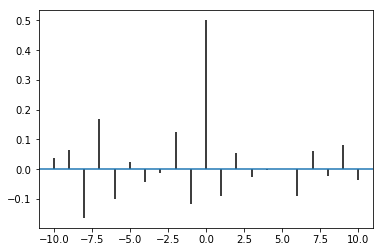

In [12]:
plt.xcorr(google_queries_log_diff, bitcoin_weekly_volume_log_diff )
plt.show()

## 1.3 Cointegration Test (non-transformed, non-stationary data)

In [13]:
coin_result = ts.coint(google_queries_and_volume["Relative Search Volume"], google_queries_and_volume["Average Volume per Week"] )

In [14]:
coin_result

(-4.1750739360208229,
 0.0039780486463637842,
 array([-3.93905865, -3.35973132, -3.06080254]))

# 2. Google SV and Bitcoin WAV in BTC

In [15]:
bitcoin_weekly_volume = pd.DataFrame.from_csv("Bitcoin Weekly Volume Data BTC.csv")
google_queries = pd.DataFrame.from_csv("Google Trends Relative Search Volume.csv")

## 2.1 Correlation of non-transformed data (Non-stationary)

In [16]:
google_queries_and_volume = pd.concat([bitcoin_weekly_volume, google_queries], axis=1)
google_queries_and_volume = google_queries_and_volume.drop(["Week"],axis=1)
google_queries_and_volume.head()

,Date,Average Volume per Week (BTC),Relative Search Volume
0,2013-04-14,20202.562639,6
1,2013-04-21,13204.207000,3
2,2013-04-28,15670.144724,3
3,2013-05-05,10198.091312,2
4,2013-05-12,7279.517695,3


### Check linearity and homoscedasticity

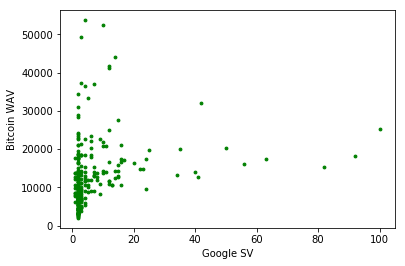

In [17]:
plt.scatter(google_queries_and_volume["Relative Search Volume"],google_queries_and_volume["Average Volume per Week (BTC)"],c="g", s=8)
plt.xlabel("Google SV")
plt.ylabel("Bitcoin WAV")
plt.show()

### Perform correlation analyis

In [18]:
stats.pearsonr(google_queries_and_volume["Relative Search Volume"], google_queries_and_volume["Average Volume per Week (BTC)"])

(0.23705815616556591, 0.00011033219070353517)

### Cross-Correlation

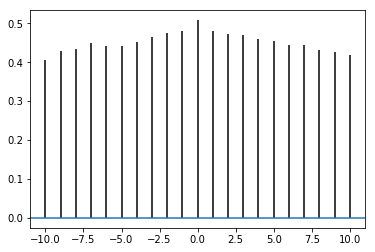

In [19]:
plt.xcorr(google_queries_and_volume["Relative Search Volume"], google_queries_and_volume["Average Volume per Week (BTC)"] )
plt.show()

## 2.2 Correlation of first log differences (stationary)

### Calculate First log differences

In [20]:
bitcoin_weekly_volume_log = bitcoin_weekly_volume["Average Volume per Week (BTC)"].apply(np.log)

In [21]:
bitcoin_weekly_volume_log_diff = bitcoin_weekly_volume_log.diff()
bitcoin_weekly_volume_log_diff = bitcoin_weekly_volume_log_diff.drop(0)
bitcoin_weekly_volume_log_diff.head()

1   -0.425274
2    0.171222
3   -0.429557
4   -0.337136
5   -0.042699
Name: Average Volume per Week (BTC), dtype: float64

In [22]:
google_queries_log = google_queries["Relative Search Volume"].apply(np.log)
google_queries_log_diff = google_queries_log.diff()
google_queries_log_diff = google_queries_log_diff.drop(0)
google_queries_log_diff.head()

1   -0.693147
2    0.000000
3   -0.405465
4    0.405465
5   -0.405465
Name: Relative Search Volume, dtype: float64

### Check linearity and homoscedasticity

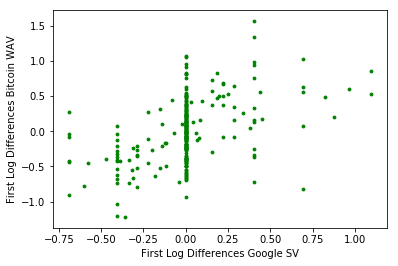

In [23]:
plt.scatter(google_queries_log_diff, bitcoin_weekly_volume_log_diff,c="g", s=8)
plt.xlabel("First Log Differences Google SV")
plt.ylabel("First Log Differences Bitcoin WAV")
plt.show()

### Perform correlation analysis

In [24]:
stats.pearsonr(google_queries_log_diff, bitcoin_weekly_volume_log_diff)

(0.47234509110137862, 7.4508000232835695e-16)

### Cross-Correlation

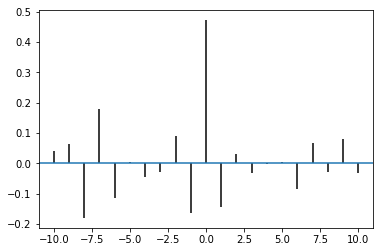

In [25]:
plt.xcorr(google_queries_log_diff, bitcoin_weekly_volume_log_diff )
plt.show()

# 3. Wikipedia PV and Bitcoin DV in USD

In [26]:
bitcoin_daily_volume = pd.DataFrame.from_csv("Bitcoin Daily Volume Data USD.csv")
wikipedia_pageviews = pd.DataFrame.from_csv("Wikipedia Pageview Data.csv")

## 3.1 Correlation of non-transformed data (non-stationary)

In [27]:
wikipedia_pageviews_and_volume = pd.concat([bitcoin_daily_volume, wikipedia_pageviews], axis=1)
wikipedia_pageviews_and_volume.head()

,Date,Volume (Currency),Pageviews
0,2015-07-01,3.453026e+06,12957
1,2015-07-02,2.515779e+06,9802
2,2015-07-03,2.331332e+06,8307
3,2015-07-04,2.037201e+06,8947
4,2015-07-05,5.689203e+06,8692


### Check linearity and homoscedasticity

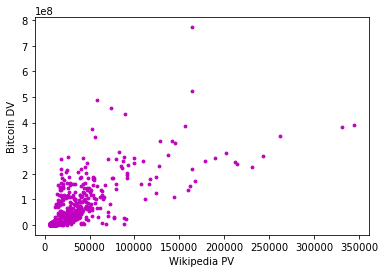

In [28]:
plt.scatter(wikipedia_pageviews_and_volume["Pageviews"],wikipedia_pageviews_and_volume["Volume (Currency)"],c="m", s=8)
plt.xlabel("Wikipedia PV")
plt.ylabel("Bitcoin DV")
plt.show()

### Perform correlation analysis

In [29]:
stats.pearsonr(wikipedia_pageviews_and_volume["Pageviews"], wikipedia_pageviews_and_volume["Volume (Currency)"])

(0.74800577678092484, 2.9113309863118996e-183)

### Cross-Correlation

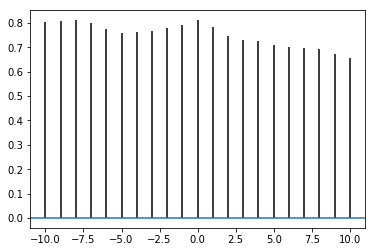

In [30]:
plt.xcorr(wikipedia_pageviews_and_volume["Pageviews"], wikipedia_pageviews_and_volume["Volume (Currency)"])
plt.show()

## 3.2 Correlation of first log differences (stationary)

### Calculate First Log Differences

In [31]:
bitcoin_daily_volume_log = bitcoin_daily_volume["Volume (Currency)"].apply(np.log)
bitcoin_daily_volume_log_diff = bitcoin_daily_volume_log.diff()
bitcoin_daily_volume_log_diff = bitcoin_daily_volume_log_diff.drop(0)
bitcoin_daily_volume_log_diff.head()

1   -0.316669
2   -0.076143
3   -0.134863
4    1.026993
5   -0.038691
Name: Volume (Currency), dtype: float64

In [32]:
wikipedia_pageviews_log = wikipedia_pageviews["Pageviews"].apply(np.log)
wikipedia_pageviews_log_diff = wikipedia_pageviews_log.diff()
wikipedia_pageviews_log_diff = wikipedia_pageviews_log_diff.drop(0)
wikipedia_pageviews_log_diff.head()

1   -0.279050
2   -0.165488
3    0.074220
4   -0.028915
5    0.166142
Name: Pageviews, dtype: float64

### Check linearity and homoscedasticity

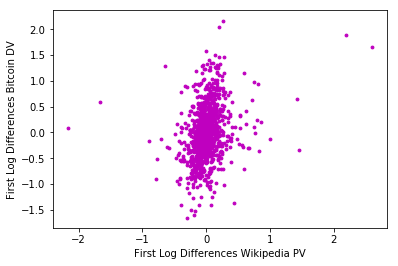

In [33]:
plt.scatter(wikipedia_pageviews_log_diff, bitcoin_daily_volume_log_diff,c="m", s=8)
plt.xlabel("First Log Differences Wikipedia PV")
plt.ylabel("First Log Differences Bitcoin DV")
plt.show()

### Perform correlation analysis

In [34]:
stats.pearsonr(wikipedia_pageviews_log_diff, bitcoin_daily_volume_log_diff)

(0.27492540680551975, 4.1188226526082737e-19)

### Cross-Correlation

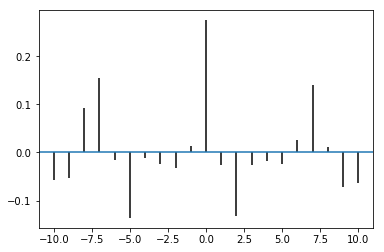

In [35]:
plt.xcorr(wikipedia_pageviews_log_diff, bitcoin_daily_volume_log_diff)
plt.show()

# 3.3 Cointegration test (non-transformed, non-stationary data)

In [36]:
coin_result = ts.coint(wikipedia_pageviews_and_volume["Pageviews"], wikipedia_pageviews_and_volume["Volume (Currency)"] )

In [37]:
coin_result

(-4.685945774536167,
 0.00059618771868439745,
 array([-3.9072306 , -3.34213865, -3.04861883]))

# 4. Wikipedia PV and Bitcoin DV in BTC

In [38]:
bitcoin_daily_volume = pd.DataFrame.from_csv("Bitcoin Daily Volume Data BTC.csv")
wikipedia_pageviews = pd.DataFrame.from_csv("Wikipedia Pageview Data.csv")

## 4.1 Correlation of non-transformed data (non-stationary)

In [39]:
wikipedia_pageviews_and_volume = pd.concat([bitcoin_daily_volume, wikipedia_pageviews], axis=1)
wikipedia_pageviews_and_volume.head()

,Date,Volume (BTC),Pageviews
0,2015-07-01,13395.153439,12957
1,2015-07-02,9826.994781,9802
2,2015-07-03,9153.852565,8307
3,2015-07-04,7909.856729,8947
4,2015-07-05,21362.613650,8692


### Check linearity and homoscedasticity

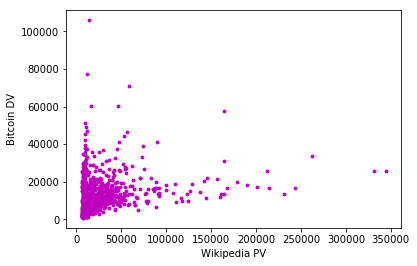

In [40]:
plt.scatter(wikipedia_pageviews_and_volume["Pageviews"],wikipedia_pageviews_and_volume["Volume (BTC)"],c="m", s=8)
plt.xlabel("Wikipedia PV")
plt.ylabel("Bitcoin DV")
plt.show()

### Perform correlation analysis

In [41]:
stats.pearsonr(wikipedia_pageviews_and_volume["Pageviews"], wikipedia_pageviews_and_volume["Volume (BTC)"])

(0.26195076377751997, 1.8871556479678164e-17)

### Cross-Correlation

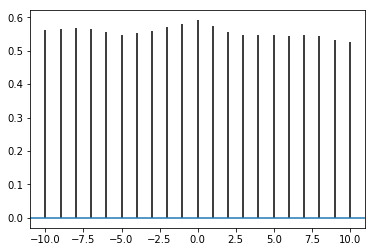

In [42]:
plt.xcorr(wikipedia_pageviews_and_volume["Pageviews"], wikipedia_pageviews_and_volume["Volume (BTC)"])
plt.show()

## 4.2 Correlation of first log differences (stationary)

### Calculate First Log Differences

In [43]:
bitcoin_daily_volume_log = bitcoin_daily_volume["Volume (BTC)"].apply(np.log)
bitcoin_daily_volume_log_diff = bitcoin_daily_volume_log.diff()
bitcoin_daily_volume_log_diff = bitcoin_daily_volume_log_diff.drop(0)
bitcoin_daily_volume_log_diff.head()

1   -0.309760
2   -0.070958
3   -0.146065
4    0.993533
5   -0.064518
Name: Volume (BTC), dtype: float64

In [44]:
wikipedia_pageviews_log = wikipedia_pageviews["Pageviews"].apply(np.log)
wikipedia_pageviews_log_diff = wikipedia_pageviews_log.diff()
wikipedia_pageviews_log_diff = wikipedia_pageviews_log_diff.drop(0)
wikipedia_pageviews_log_diff.head()

1   -0.279050
2   -0.165488
3    0.074220
4   -0.028915
5    0.166142
Name: Pageviews, dtype: float64

### Check linearity and homoscedasticity

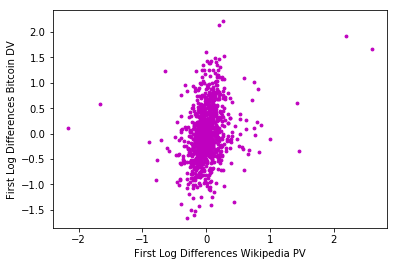

In [45]:
plt.scatter(wikipedia_pageviews_log_diff, bitcoin_daily_volume_log_diff,c="m", s=8)
plt.xlabel("First Log Differences Wikipedia PV")
plt.ylabel("First Log Differences Bitcoin DV")
plt.show()

### Perform correlation analysis

In [46]:
stats.pearsonr(wikipedia_pageviews_log_diff, bitcoin_daily_volume_log_diff)

(0.2695632490640445, 2.0836105430847551e-18)

### Cross-Correlation

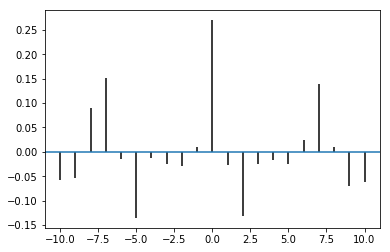

In [47]:
plt.xcorr(wikipedia_pageviews_log_diff, bitcoin_daily_volume_log_diff)
plt.show()

# 5. Control Variable: Google SV Worldwide and Bitcoin WAV in USD

In [48]:
bitcoin_weekly_volume = pd.DataFrame.from_csv("Bitcoin Weekly Volume Data USD.csv")
google_queries_worldwide = pd.DataFrame.from_csv("Google Trends Relative Search Volume Worldwide.csv")

## 5.1 Correlation of non-transformed data (Non-stationary)

In [49]:
google_queries_and_volume = pd.concat([bitcoin_weekly_volume, google_queries_worldwide], axis=1)
google_queries_and_volume = google_queries_and_volume.drop(["Week"],axis=1)
google_queries_and_volume.head()

,Date,Average Volume per Week,Relative Search Volume Worldwide
0,2013-04-14,1.815588e+06,6
1,2013-04-21,1.770383e+06,3
2,2013-04-28,1.770067e+06,3
3,2013-05-05,1.154001e+06,3
4,2013-05-12,8.223102e+05,2


### Check linearity and homoscedasticity

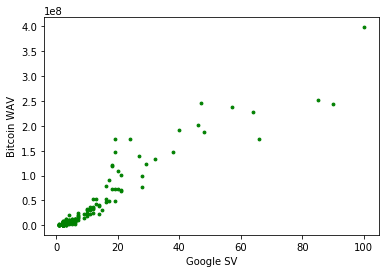

In [50]:
plt.scatter(google_queries_and_volume["Relative Search Volume Worldwide"],google_queries_and_volume["Average Volume per Week"],c="g", s=8)
plt.xlabel("Google SV")
plt.ylabel("Bitcoin WAV")
plt.show()

### Perform correlation analyis

In [51]:
stats.pearsonr(google_queries_and_volume["Relative Search Volume Worldwide"], google_queries_and_volume["Average Volume per Week"])

(0.94994112655737628, 7.2040614811178236e-133)

### Cross-Correlation

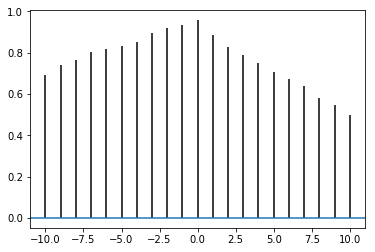

In [52]:
plt.xcorr(google_queries_and_volume["Relative Search Volume Worldwide"], google_queries_and_volume["Average Volume per Week"] )
plt.show()

## 5.2 Correlation of first log differences (stationary)

### Calculate First log differences

In [53]:
bitcoin_weekly_volume_log = bitcoin_weekly_volume["Average Volume per Week"].apply(np.log)

In [54]:
bitcoin_weekly_volume_log_diff = bitcoin_weekly_volume_log.diff()
bitcoin_weekly_volume_log_diff = bitcoin_weekly_volume_log_diff.drop(0)
bitcoin_weekly_volume_log_diff.head()

1   -0.025213
2   -0.000179
3   -0.427782
4   -0.338873
5    0.033076
Name: Average Volume per Week, dtype: float64

In [55]:
google_queries_worldwide_log = google_queries_worldwide["Relative Search Volume Worldwide"].apply(np.log)
google_queries_worldwide_log_diff = google_queries_worldwide_log.diff()
google_queries_worldwide_log_diff = google_queries_worldwide_log_diff.drop(0)
google_queries_worldwide_log_diff.head()

1   -0.693147
2    0.000000
3    0.000000
4   -0.405465
5    0.000000
Name: Relative Search Volume Worldwide, dtype: float64

### Check linearity and homoscedasticity

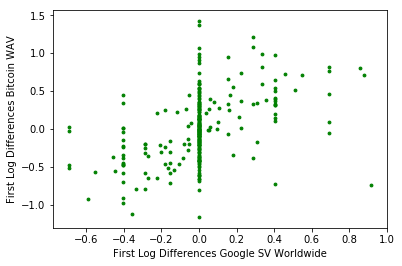

In [56]:
plt.scatter(google_queries_worldwide_log_diff, bitcoin_weekly_volume_log_diff,c="g", s=8)
plt.xlabel("First Log Differences Google SV Worldwide")
plt.ylabel("First Log Differences Bitcoin WAV")
plt.show()

### Perform correlation analysis

In [57]:
stats.pearsonr(google_queries_worldwide_log_diff, bitcoin_weekly_volume_log_diff)

(0.47157748233484514, 8.4161317271309796e-16)

### Cross-Correlation

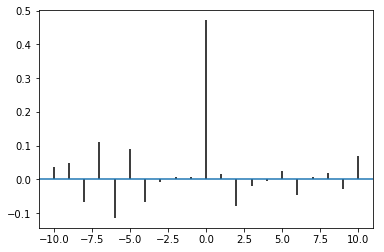

In [58]:
plt.xcorr(google_queries_worldwide_log_diff, bitcoin_weekly_volume_log_diff )
plt.show()

## 5.3 Cointegration Test (non-transformed, non-stationary data)

In [59]:
coin_result = ts.coint(google_queries_and_volume["Relative Search Volume Worldwide"], google_queries_and_volume["Average Volume per Week"] )

In [60]:
coin_result

(-3.0467455615447698,
 0.099507703457254515,
 array([-3.93905865, -3.35973132, -3.06080254]))

# 6. Control Variable: Google SV Worldwide and Bitcoin WAV in BTC

In [61]:
bitcoin_weekly_volume = pd.DataFrame.from_csv("Bitcoin Weekly Volume Data BTC.csv")
google_queries_worldwide = pd.DataFrame.from_csv("Google Trends Relative Search Volume Worldwide.csv")

## 6.1 Correlation of non-transformed data (Non-stationary)

In [62]:
google_queries_and_volume = pd.concat([bitcoin_weekly_volume, google_queries_worldwide], axis=1)
google_queries_and_volume = google_queries_and_volume.drop(["Week"],axis=1)
google_queries_and_volume.head()

,Date,Average Volume per Week (BTC),Relative Search Volume Worldwide
0,2013-04-14,20202.562639,6
1,2013-04-21,13204.207000,3
2,2013-04-28,15670.144724,3
3,2013-05-05,10198.091312,3
4,2013-05-12,7279.517695,2


### Check linearity and homoscedasticity

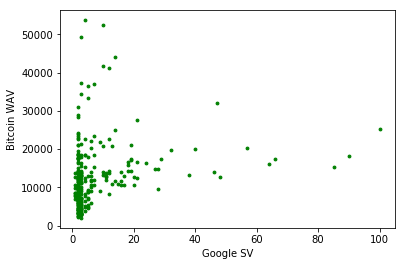

In [63]:
plt.scatter(google_queries_and_volume["Relative Search Volume Worldwide"],google_queries_and_volume["Average Volume per Week (BTC)"],c="g", s=8)
plt.xlabel("Google SV")
plt.ylabel("Bitcoin WAV")
plt.show()

### Perform correlation analyis

In [64]:
stats.pearsonr(google_queries_and_volume["Relative Search Volume Worldwide"], google_queries_and_volume["Average Volume per Week (BTC)"])

(0.22911595590751827, 0.00018883744212551474)

### Cross-Correlation

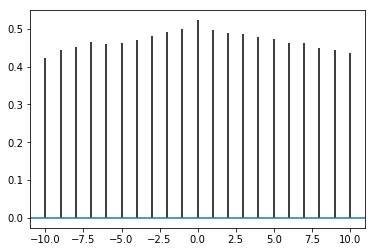

In [65]:
plt.xcorr(google_queries_and_volume["Relative Search Volume Worldwide"], google_queries_and_volume["Average Volume per Week (BTC)"] )
plt.show()

## 6.2 Correlation of first log differences (stationary)

### Calculate First log differences

In [66]:
bitcoin_weekly_volume_log = bitcoin_weekly_volume["Average Volume per Week (BTC)"].apply(np.log)

In [67]:
bitcoin_weekly_volume_log_diff = bitcoin_weekly_volume_log.diff()
bitcoin_weekly_volume_log_diff = bitcoin_weekly_volume_log_diff.drop(0)
bitcoin_weekly_volume_log_diff.head()

1   -0.425274
2    0.171222
3   -0.429557
4   -0.337136
5   -0.042699
Name: Average Volume per Week (BTC), dtype: float64

In [68]:
google_queries_worldwide_log = google_queries_worldwide["Relative Search Volume Worldwide"].apply(np.log)
google_queries_worldwide_log_diff = google_queries_worldwide_log.diff()
google_queries_worldwide_log_diff = google_queries_worldwide_log_diff.drop(0)
google_queries_worldwide_log_diff.head()

1   -0.693147
2    0.000000
3    0.000000
4   -0.405465
5    0.000000
Name: Relative Search Volume Worldwide, dtype: float64

### Check linearity and homoscedasticity

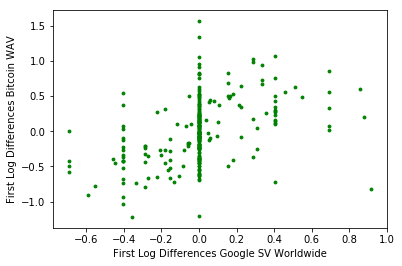

In [69]:
plt.scatter(google_queries_worldwide_log_diff, bitcoin_weekly_volume_log_diff,c="g", s=8)
plt.xlabel("First Log Differences Google SV Worldwide")
plt.ylabel("First Log Differences Bitcoin WAV")
plt.show()

### Perform correlation analysis

In [70]:
stats.pearsonr(google_queries_worldwide_log_diff, bitcoin_weekly_volume_log_diff)

(0.43724087961791336, 1.4491314924152492e-13)

### Cross-Correlation

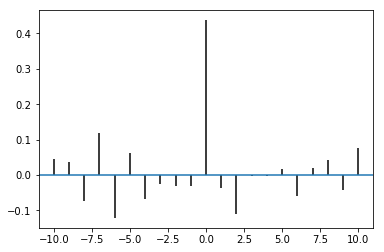

In [71]:
plt.xcorr(google_queries_worldwide_log_diff, bitcoin_weekly_volume_log_diff )
plt.show()